<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/211102_COVID_19_Data_Analysis_Bruno_Tucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Environment Set Up**

In [1]:
#import libraries
import numpy as np
import pandas as pd

# **Task 2: Data Collection**

In [3]:
#df1 = pd.read_csv('/content/drive/MyDrive/covid.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/COVID-19_Daily_Testing.csv')
df1.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


BT: Data cleaning of github .csv file involved putting the dates in a consistent format, converting objects to numeric types, and deleting one row with a missing date. The cleaned .csv file was uploaded to Google drive and imported  into this Colabs workbook.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
df1 = pd.read_csv('/content/drive/MyDrive/covid_.csv')

In [24]:
df1.head

<bound method NDFrame.head of          Date  ... People Not-Positive - Unknown Race/Ethnicity
0    3/1/2020  ...                                            0
1    3/2/2020  ...                                            4
2    3/3/2020  ...                                           20
3    3/4/2020  ...                                           20
4    3/5/2020  ...                                            7
..        ...  ...                                          ...
83  5/25/2020  ...                                          602
84  5/26/2020  ...                                         2692
85  5/27/2020  ...                                         2401
86  5/28/2020  ...                                         2155
87  5/31/2020  ...                                          551

[88 rows x 59 columns]>

In [25]:
df1.shape

(88, 59)

In [26]:
df1.describe

<bound method NDFrame.describe of          Date  ... People Not-Positive - Unknown Race/Ethnicity
0    3/1/2020  ...                                            0
1    3/2/2020  ...                                            4
2    3/3/2020  ...                                           20
3    3/4/2020  ...                                           20
4    3/5/2020  ...                                            7
..        ...  ...                                          ...
83  5/25/2020  ...                                          602
84  5/26/2020  ...                                         2692
85  5/27/2020  ...                                         2401
86  5/28/2020  ...                                         2155
87  5/31/2020  ...                                          551

[88 rows x 59 columns]>

In [27]:
df1.isnull().sum()

Date                                            0
Day                                             0
Tests                                           0
Cases                                           0
People Not-Positive - Total                     0
People Tested - Age 0-17                        0
People Tested - Age 18-29                       0
People Tested - Age 30-39                       0
People Tested - Age 40-49                       0
People Tested - Age 50-59                       0
People Tested - Age 60-69                       0
People Tested - Age 70-79                       0
People Tested - Age 80+                         0
People Tested - Age Unknown                     0
People Tested - Female                          0
People Tested - Male                            0
People Tested - Gender Unknown                  0
People Tested - Latinx                          0
People Tested - Asian Non-Latinx                0
People Tested - Black Non-Latinx                0


BT: There are no null values in the updated .csv data file. 

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         88 non-null     int64 
 3   Cases                                         88 non-null     int64 
 4   People Not-Positive - Total                   88 non-null     int64 
 5   People Tested - Age 0-17                      88 non-null     int64 
 6   People Tested - Age 18-29                     88 non-null     int64 
 7   People Tested - Age 30-39                     88 non-null     int64 
 8   People Tested - Age 40-49                     88 non-null     int64 
 9   People Tested - Age 50-59                     88 non-null     int64 
 10  Peop

BT: The figures in the .csv file were updated to integers if they weren't already integers. 

# Task 3: Data Wrangling and Exploratory Data Analysis

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

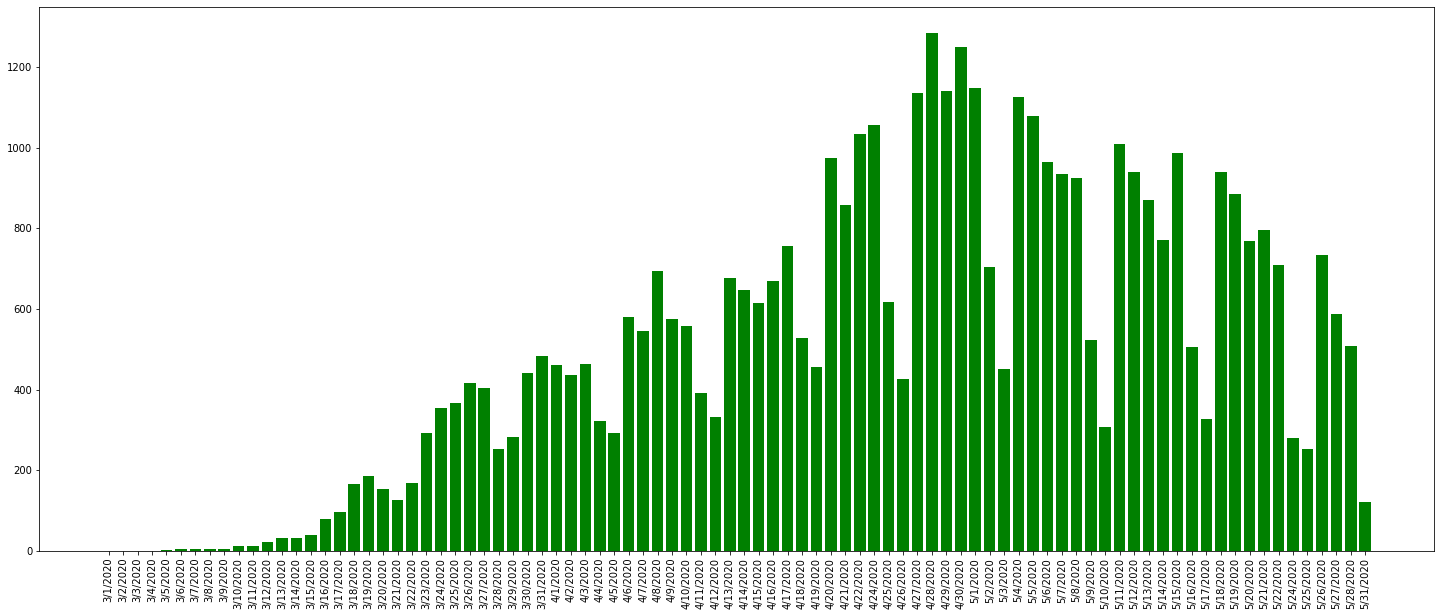

In [34]:
plt.figure(figsize=(25,10))
plt.bar(x=df1['Date'], height=df1['Cases'], color='green')
plt.xticks(rotation=90)
plt.show()

BT: This is a line plot of the number of Covid cases for all ages, genders, and ethnic groups, shown by day of the month from March 1st, 2020 to May 31st, 2020. 

In [65]:
Positive_17 = df1['People Positive - Age 0-17']

Positive_29 = df1['People Positive - Age 18-29']

Positive_80 = df1['People Positive - Age 80+']



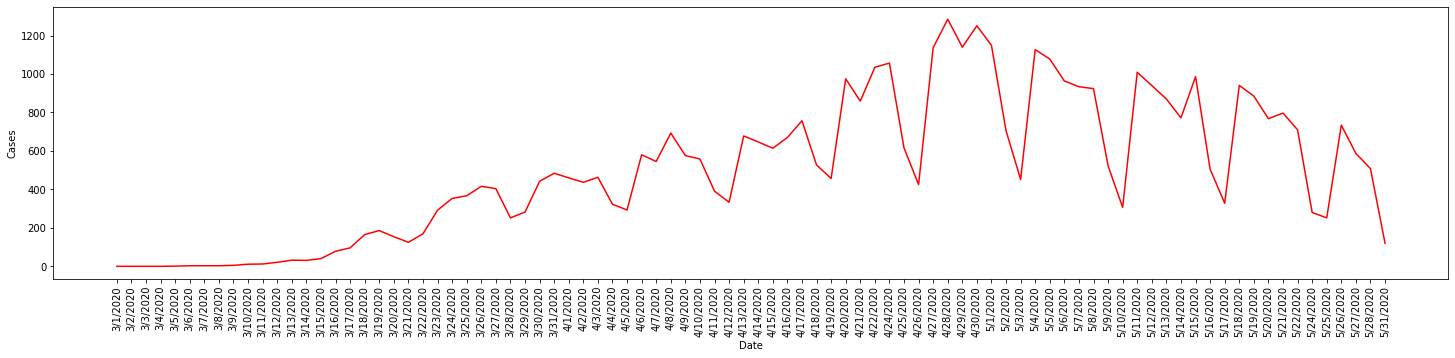

In [72]:
plt.figure(figsize=(25,5))
sns.lineplot(x = df1['Date'], y = df1['Cases'], data = Positive_80, color='Red')
#sns.lineplot(x = df1['Date'], y = df1['Cases'], data = Positive_29, color='Green')
plt.xticks(rotation=90)
plt.show()

BT: This is a line plot of the number of Covid cases for people aged 80 and older, shown by day of the month from March 1st, 2020 to May 31st, 2020. 

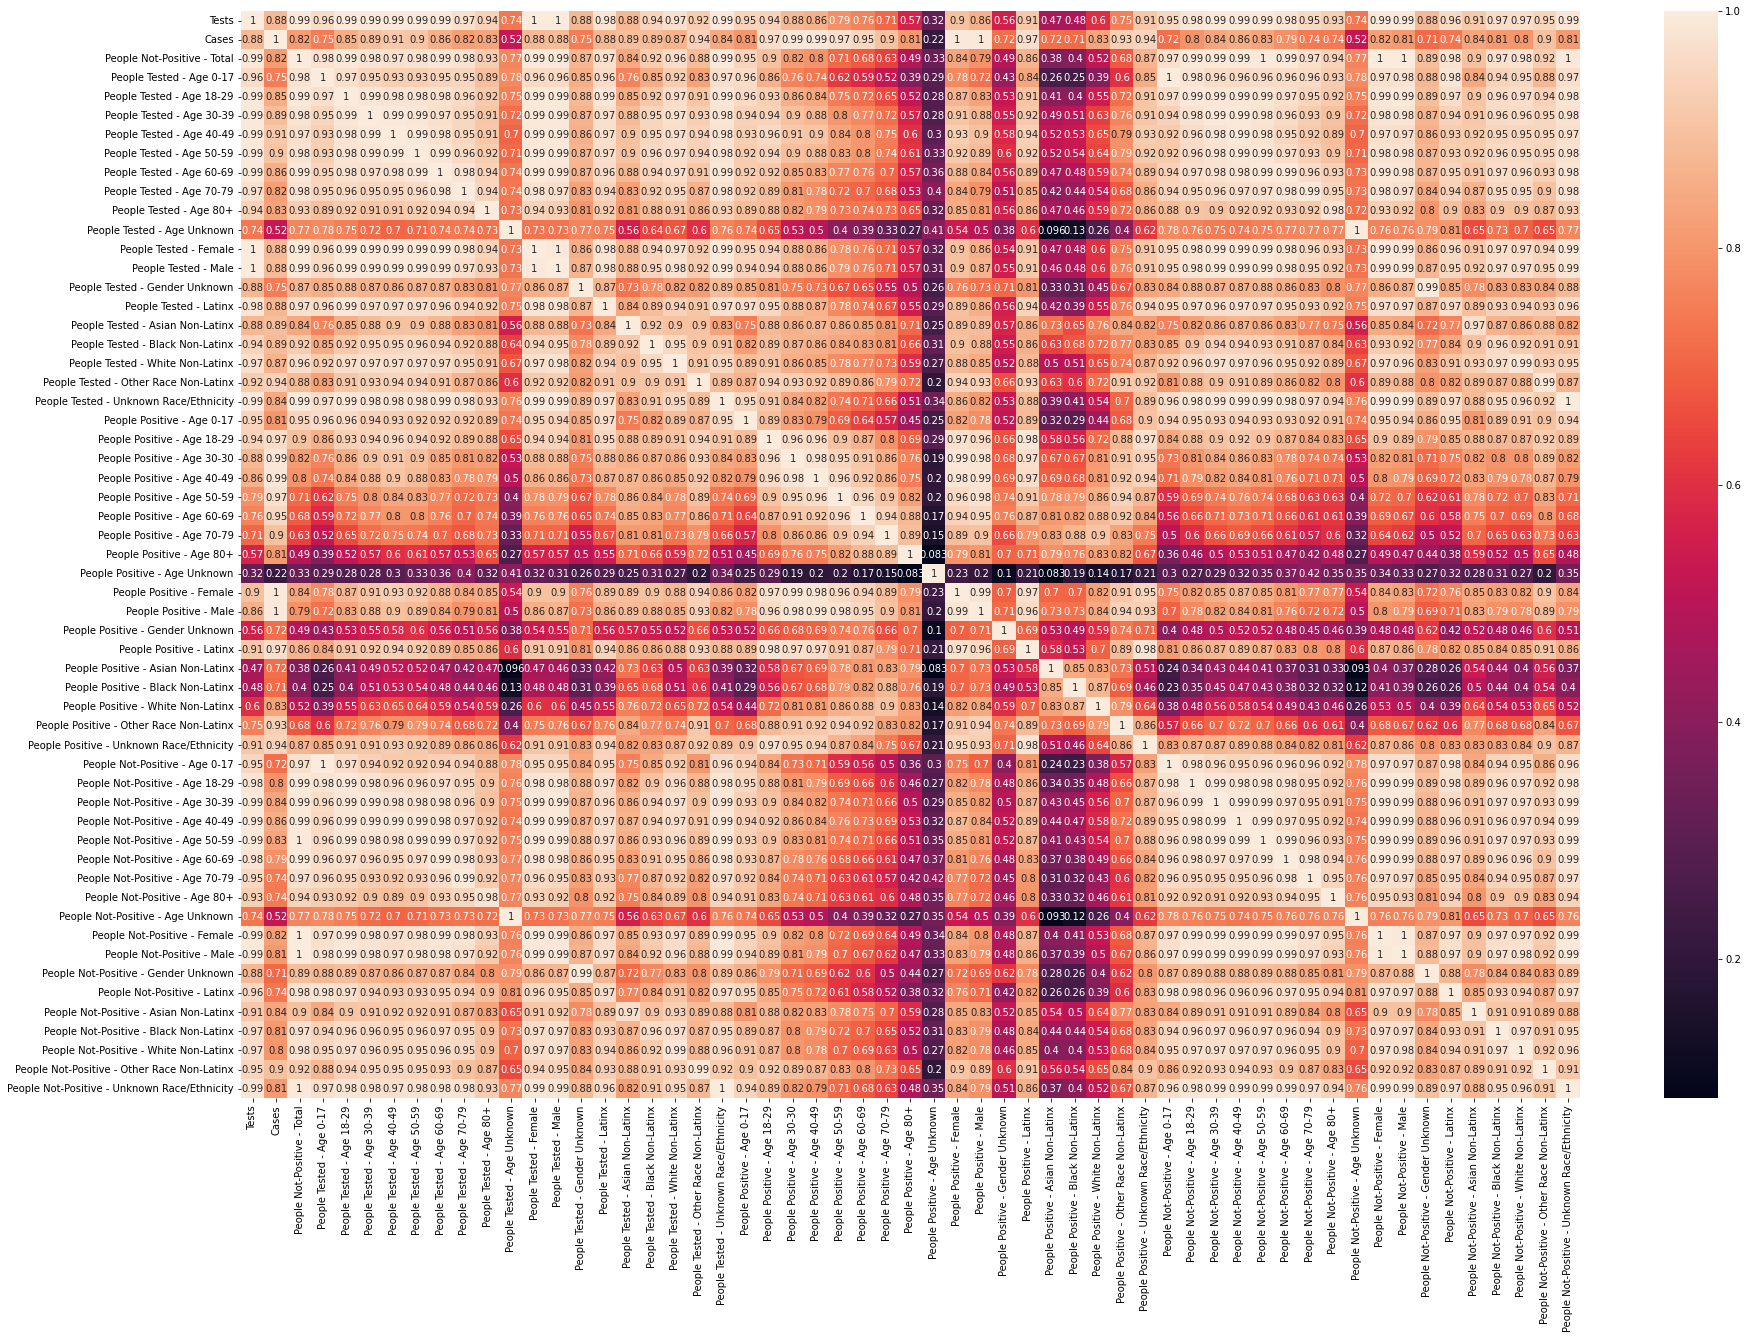

In [71]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(), annot=True)

The number of cases, i.e number of people testing positive for Covid, showed a very strong R2 correlation (above .8) with number of people tested for (A) all age groups except <17 years (.75, which is still fairly strong),  (B) all ethnic groups studied, and (C) both genders (.88 for male and female). 

The age group with the highest correlation with Cases was ages 40-49, with an R2 of .91. 

## Task 4: Preparing the data for training the Machine Learning Model

In [80]:
df_age = df1[['People Tested - Age 0-17', 'People Tested - Age 18-29',       
             'People Tested - Age 30-39', 'People Tested - Age 40-49', 'People Tested - Age 50-59', 
         'People Tested - Age 60-69', 'People Tested - Age 70-79', 'People Tested - Age 80+']]
df_age.head()

,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+
0,0,0,1,0,0,0,0,0
1,0,1,3,3,1,0,1,0
2,6,5,4,2,6,3,4,3
3,12,7,4,1,9,0,6,2
4,4,2,0,4,3,2,0,2


In [82]:
X_features = df_age
Y_target = df1['Cases']

In [83]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [84]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 22.87 


In [86]:
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 8 


## Task 5: Model Training

In [87]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [89]:
# print the dataset shape
print(df_age.shape)

(88, 8)


In [90]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(66, 8) (22, 8) (66,) (22,)


BT: the default of 75% train and 25% test is used. 

In [91]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Task 6: Model Evaluation

In [99]:
#Calculate RMSE and R-Square
from sklearn.metrics import mean_squared_error, r2_score
y_train_predict = lineReg.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))
r2 = r2_score(Y_train, y_train_predict)

In [100]:
rmse


84.29736697544418

In [101]:
r2

0.9496394062177875

In [103]:
#Model evaluation for testing set
y_test_predict = lineReg.predict(X_test)
rmse_model = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_model = r2_score(Y_test, y_test_predict)
print('RMSE for model: ', rmse_model)
print('R2 for model: ', r2_model)

RMSE for model:  128.5752933022513
R2 for model:  0.8305854408044774


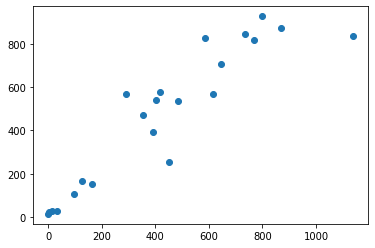

In [104]:
#plot y_test and y_pred
plt.scatter(Y_test, y_test_predict)
plt.show()

## Conclusion
BT: The Eight age groups were able to predict the number of covid cases per day with 94% accuracy. The testing data used in the model showed a 83% accuracy. 

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

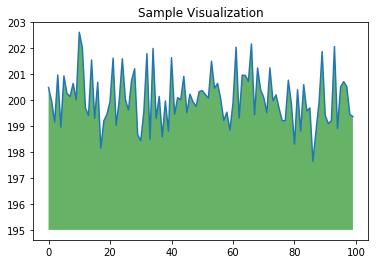

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
